# 主成分分析

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
data = sio.loadmat('D:\机器学习——Andrew_rag\code\ex7-kmeans and PCA\data\ex7data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

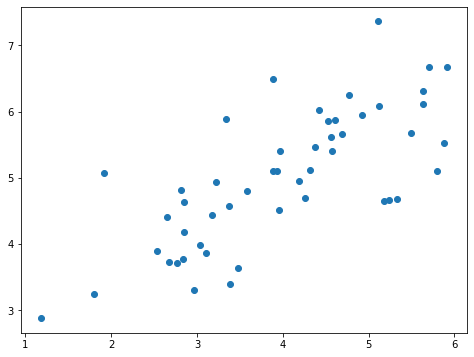

In [3]:
x = data['X']

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x[:,0], x[:,1])
plt.show()

In [4]:
def pca(x):
    x = (x - x.mean()) / x.std()
    x = np.matrix(x)
    cov = (x.T * x) / x.shape[0]

    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [5]:
U, S, V = pca(x)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [6]:
#定义降维函数
def projectdata(x, U, k):
    z = np.dot(U[:,:k].T, x.T)
    return z

z = projectdata(x, U, 1)
z

matrix([[-4.74689738, -7.15889408, -4.79563345, -4.45754509, -4.80263579,
         -7.04081342, -4.97025076, -8.75934561, -6.2232703 , -7.04497331,
         -6.91702866, -6.79543508, -6.3438312 , -6.99891495, -4.54558119,
         -8.31574426, -7.16920841, -5.08083842, -8.54077427, -6.94102769,
         -8.5978815 , -5.76620067, -8.2020797 , -6.23890078, -4.37943868,
         -5.56947441, -7.53865023, -7.70645413, -5.17158343, -6.19268884,
         -6.24385246, -8.02715303, -4.81235176, -7.07993347, -5.45953289,
         -7.60014707, -4.39612191, -7.82288033, -3.40498213, -6.54290343,
         -7.17879573, -5.22572421, -4.83081168, -7.23907851, -4.36164051,
         -6.44590096, -2.69118076, -4.61386195, -5.88236227, -7.76732508]])

In [7]:
#定义反向步骤恢复数据
def recover_data(z, U, k):
    u_reduced = np.dot(U[:,:k],z)
    u_reduced = u_reduced.T
    return u_reduced

In [8]:
x_recover = recover_data(z, U, 1)
x_recover

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

In [9]:
x_recover[:,0], list(x_recover[:,0])
#fomer is matrix2D, latter is 1D

(matrix([[3.76152442],
         [5.67283275],
         [3.80014373],
         [3.53223661],
         [3.80569251],
         [5.57926356],
         [3.93851354],
         [6.94105849],
         [4.93142811],
         [5.58255993],
         [5.48117436],
         [5.38482148],
         [5.02696267],
         [5.54606249],
         [3.60199795],
         [6.58954104],
         [5.681006  ],
         [4.02614513],
         [6.76785875],
         [5.50019161],
         [6.81311151],
         [4.56923815],
         [6.49947125],
         [4.94381398],
         [3.47034372],
         [4.41334883],
         [5.97375815],
         [6.10672889],
         [4.09805306],
         [4.90719483],
         [4.94773778],
         [6.36085631],
         [3.81339161],
         [5.61026298],
         [4.32622924],
         [6.02248932],
         [3.48356381],
         [6.19898705],
         [2.69816733],
         [5.18471099],
         [5.68860316],
         [4.14095516],
         [3.82801958],
         [5

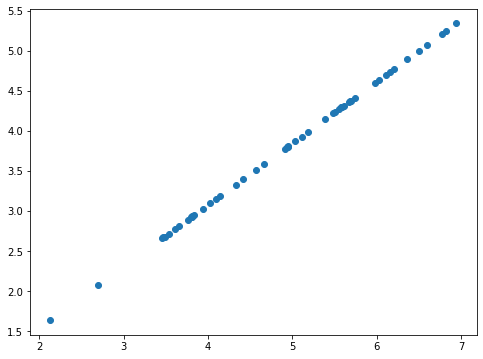

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(list(x_recover[:,0]), list(x_recover[:,1]))
plt.show()

# PCA处理人脸数据

In [12]:
face = sio.loadmat('D:\机器学习——Andrew_rag\code\ex7-kmeans and PCA\data\ex7faces.mat')
face

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]])}

In [13]:
x_face = face['X']
print(x_face.shape)

(5000, 1024)


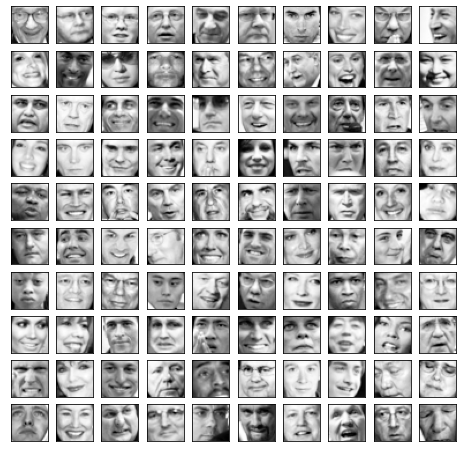

In [14]:
def plotimage(x, row, col):
    fig, ax = plt.subplots(row, col, figsize=(8,8))
    for r in range(row):
        for c in range(col):
            ax[r][c].imshow(x[r*col + c].reshape(32, 32).T, cmap='Greys_r')
            ax[r][c].set_xticks([])
            ax[r][c].set_yticks([])
    plt.show()

plotimage(x_face, 10, 10)

In [15]:
U_face, S_face, V_face = pca(x_face)
U_face, S_face, V_face

(matrix([[-0.01640988, -0.04222849, -0.0421747 , ...,  0.00078787,
           0.00059301,  0.00069988],
         [-0.01692408, -0.04109658, -0.04413594, ..., -0.0014743 ,
          -0.00159743, -0.00183183],
         [-0.01714767, -0.03963341, -0.04577663, ...,  0.00796443,
           0.00053733,  0.00152458],
         ...,
         [-0.0085838 , -0.05826306,  0.04851035, ..., -0.00294466,
           0.00394326,  0.00497121],
         [-0.00680308, -0.06081527,  0.04664601, ...,  0.00038729,
          -0.00186067, -0.00185365],
         [-0.005765  , -0.06173977,  0.04483153, ...,  0.00228049,
           0.00058499,  0.00071138]]),
 array([2.62189504e+02, 1.86275072e+02, 1.17780320e+02, ...,
        1.76409446e-04, 1.66475262e-04, 1.60785895e-04]),
 matrix([[-0.01640988, -0.01692408, -0.01714767, ..., -0.0085838 ,
          -0.00680308, -0.005765  ],
         [-0.04222849, -0.04109658, -0.03963341, ..., -0.05826306,
          -0.06081527, -0.06173977],
         [-0.0421747 , -0.0441359

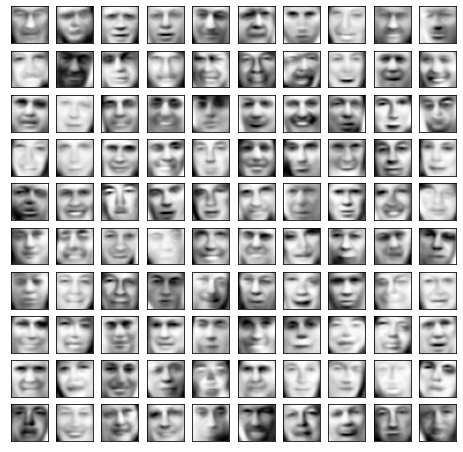

In [16]:
z_face = projectdata(x_face, U_face, 36)
x_recover_face = recover_data(z_face, U_face, 36)
plotimage(x_recover_face, 10, 10)